# Cross Fold model



To begin with, load the data frame created in Part 1. You may either repeat Sec. 1 on the original file or save the data frame from Part 1 and load it here.

In [ ]:
import pandas as pd

Raw_data = pd.read_csv("day.csv")
Raw_data.head()


print("Shape of DataFrame:", Raw_data.shape)


print(Raw_data.dtypes)


Raw_data['dteday'] = pd.to_datetime(Raw_data['dteday'])
print(Raw_data.dtypes)



Raw_data['yr'] = Raw_data['dteday'].dt.year

print(Raw_data.head())



columns_to_remove = ['casual', 'registered', 'instant', 'yr', 'atemp']
new_data = Raw_data.drop(columns=columns_to_remove)

print(new_data)


missing_values = new_data.isna().sum()

print(missing_values)





Shape of DataFrame: (731, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
   instant     dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1  2011     1        0 

## 3. Feature Selection

Feature selection is critical for building effective machine learning models. It helps to reduce the noise in the data, improve model performance, and decrease the computational cost.

3.1 Display the list of feature names (column names).

In [ ]:
Column_names = new_data.columns.tolist()
print("Column names:")
print(Column_names)

Column names:
['dteday', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']


In [ ]:
print(new_data.columns)

Index(['dteday', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


3.2 Create new features:
- "is_weekend": indicates whether the day was during a weekend
- Apply one-hot encoding to "season" and "weathersit" using [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Please also remove the feature 'dteday' from the data frame.

In [ ]:
#5 workdays in week rest week end
new_data['is_weekend'] = (new_data['dteday'].dt.dayofweek >= 5).astype(int)



new_data = pd.get_dummies(new_data, columns=['season', 'weathersit'], drop_first=True)

new_data.drop(columns=['dteday'], inplace=True)


print(new_data.head())

   mnth  holiday  weekday  workingday      temp       hum  windspeed   cnt  \
0     1        0        6           0  0.344167  0.805833   0.160446   985   
1     1        0        0           0  0.363478  0.696087   0.248539   801   
2     1        0        1           1  0.196364  0.437273   0.248309  1349   
3     1        0        2           1  0.200000  0.590435   0.160296  1562   
4     1        0        3           1  0.226957  0.436957   0.186900  1600   

   is_weekend  season_2  season_3  season_4  weathersit_2  weathersit_3  
0           1     False     False     False          True         False  
1           1     False     False     False          True         False  
2           0     False     False     False         False         False  
3           0     False     False     False         False         False  
4           0     False     False     False         False         False  


3.3 Calculate the matrix of correlation coefficients between input features and the output feature (the 'cnt' column). Examine the features that has -0.1 < coefficient < 0.1 with the `cnt` column. Decide whether you should remove them from the dataset.

In [ ]:
correlation_matrix = new_data.corr()

In [ ]:
low_correlation_features = correlation_matrix[(correlation_matrix['cnt'] > -0.1) & (correlation_matrix['cnt'] < 0.1)]

print("Features correlation coefficient from -0.1 to 0.1: ")
print('\n',low_correlation_features.head())


#I see that the correlation coefficients are all close to or below 0 which means there is no significant
#relationships between 'cnt' and all the other comparing features. Since, the correlation is not strong I will get rid of the features and analyze further.


Features correlation coefficient from -0.1 to 0.1: 

                 mnth   holiday   weekday  workingday      temp       hum  \
holiday     0.019191  1.000000 -0.101960   -0.253023 -0.028556 -0.015937   
weekday     0.009509 -0.101960  1.000000    0.035790 -0.000170 -0.052232   
workingday -0.005901 -0.253023  0.035790    1.000000  0.052660  0.024327   
is_weekend -0.001021 -0.109187  0.000867   -0.934049 -0.043564 -0.019112   
season_4    0.686954  0.016915 -0.008771   -0.005149 -0.224793  0.162732   

            windspeed       cnt  is_weekend  season_2  season_3  season_4  \
holiday      0.006292 -0.068348   -0.109187 -0.024265 -0.026247  0.016915   
weekday      0.014282  0.067443    0.000867 -0.002355  0.010177 -0.008771   
workingday  -0.018796  0.061156   -0.934049  0.014543  0.016218 -0.005149   
is_weekend   0.016990 -0.037604    1.000000 -0.005985 -0.006974 -0.000954   
season_4    -0.135466  0.065593   -0.000954 -0.329051 -0.333831  1.000000   

            weathersit_2  

In [ ]:
features_to_remove = low_correlation_features.index.tolist()

print('Remove list:', features_to_remove)

remaining_features_data = new_data.drop(columns=features_to_remove)

print("\nRemaining features after removal of low_correlation_features:")
print(remaining_features_data.head())


Remove list: ['holiday', 'weekday', 'workingday', 'is_weekend', 'season_4']

Remaining features after removal of low_correlation_features:
   mnth      temp       hum  windspeed   cnt  season_2  season_3  \
0     1  0.344167  0.805833   0.160446   985     False     False   
1     1  0.363478  0.696087   0.248539   801     False     False   
2     1  0.196364  0.437273   0.248309  1349     False     False   
3     1  0.200000  0.590435   0.160296  1562     False     False   
4     1  0.226957  0.436957   0.186900  1600     False     False   

   weathersit_2  weathersit_3  
0          True         False  
1          True         False  
2         False         False  
3         False         False  
4         False         False  


3.4 Data normalization. Apply standard scaling to all **input features**. The output column "cnt" should not be modified. Display the first 5 rows of the transformed dataset.

In [ ]:
#reset and transform
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaler fit without 'cnt'
scaler.fit(remaining_features_data.drop(columns=['cnt']))

scaled_features = scaler.transform(remaining_features_data.drop(columns=['cnt']))

# DF with 'cnt'
scaler_df = pd.DataFrame(scaled_features, columns=remaining_features_data.drop(columns=['cnt']).columns)
scaler_df['cnt'] = remaining_features_data['cnt']

print(scaler_df.head())


       mnth      temp       hum  windspeed  season_2  season_3  weathersit_2  \
0 -1.600161 -0.826662  1.250171  -0.387892 -0.579983 -0.588409      1.399826   
1 -1.600161 -0.721095  0.479113   0.749602 -0.579983 -0.588409      1.399826   
2 -1.600161 -1.634657 -1.339274   0.746632 -0.579983 -0.588409     -0.714374   
3 -1.600161 -1.614780 -0.263182  -0.389829 -0.579983 -0.588409     -0.714374   
4 -1.600161 -1.467414 -1.341494  -0.046307 -0.579983 -0.588409     -0.714374   

   weathersit_3   cnt  
0     -0.171981   985  
1     -0.171981   801  
2     -0.171981  1349  
3     -0.171981  1562  
4     -0.171981  1600  


## 4. Model Building and Evalutaion

After selecting the most relevant features, the next step is to build and evaluate machine learning models.

4.1 Split the dataset into training set, validation set, and test set, with a 70:15:15 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

# Traning 70 temp 30
train_data, temp_data = train_test_split(scaler_df, test_size=0.3, random_state=42)

# Temp to validation 15 test 15
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Training:", train_data.shape)
print("Validation:", val_data.shape)
print("Test:", test_data.shape)


Training: (511, 9)
Validation: (110, 9)
Test: (110, 9)


4.2 Build a linear regression model on the dataset as the baseline model.

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = train_data.drop(columns=['cnt'])
y_train = train_data['cnt']

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)


LinearRegression()

4.3 Build a degree-2 polynomial regression model with L1 regularization.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# polynomial features and Lasso regression
degree = 2
alpha = 0.1
max_iter = 10000  #Coverage warning!
poly_reg_model = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    Lasso(alpha=alpha, max_iter=max_iter)
)

poly_reg_model.fit(X_train, y_train)

train_predictions = poly_reg_model.predict(X_train)

# MSE
train_mse = mean_squared_error(y_train, train_predictions)

print("Training MSE:", train_mse)

Training MSE: 1365688.2540325422


4.4 Perform 5-fold cross-validation on both models to ensure that the model's performance is consistent across different subsets of the data.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline

degree = 2
alpha = 0.1
max_iter = 20000

# linear
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Poly
poly_reg_model = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    Lasso(alpha=alpha, max_iter=max_iter)
)
poly_reg_model.fit(X_train, y_train)

# 5-fold cross-validation linear reg
mse_scores_linear = cross_val_score(linear_reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_linear = -mse_scores_linear.mean()

# 5-fold cross-validation polynomial reg
mse_scores_poly = cross_val_score(poly_reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_poly = -mse_scores_poly.mean()

print(f"Mean MSE for Linear Regression: {mean_mse_linear}")
print(f"Mean MSE for Polynomial Regression: {mean_mse_poly}")


Mean MSE for Linear Regression: 1805388.2564657866
Mean MSE for Polynomial Regression: 1773597.3514954026


4.5 Model evaluation: Calculate the RMSE of both models on the validation set.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


X_val = val_data.drop(columns=['cnt'])
y_val = val_data['cnt']

# Predictions Linear model
linear_reg_val_predictions = linear_reg_model.predict(X_val)

# RMSE
linear_reg_val_rmse = np.sqrt(mean_squared_error(y_val, linear_reg_val_predictions))

# Predictions polynomial model
poly_reg_val_predictions = poly_reg_model.predict(X_val)

# RMSE
poly_reg_val_rmse = np.sqrt(mean_squared_error(y_val, poly_reg_val_predictions))

print(f"RMSE Linear model: {linear_reg_val_rmse}")
print(f"RMSE polynomial model: {poly_reg_val_rmse}")

#Here the polynomial model indicates better predictive models

RMSE Linear model: 1380.8698380712858
RMSE polynomial model: 1186.3526932402676


## Phase 5: Model Fine-Tuning

Let's fine-tune the polynomial model to optimize its performance.

5.1 Use grid search to fine-tune the hyperparameters of the polynomial model, including:
- degree of the polynomial
- regularization coefficient `alpha`

**Note:** As these two hyper-parameters are used in different places, `GridSearchCV` may not be directly applicable. You need to use for-loops to example all combinations of values.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("polynomial_features", PolynomialFeatures()),
    ("lasso", Lasso())
])

param_grid = {
    "polynomial_features__degree": [1, 2, 3],
    "lasso__alpha": np.logspace(-3, 3, 7)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)

# model fit
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

#I tried with greater max_iterater and went over 100000 but still had the coverage issue. The results still showed
#polynomial feature degree: 2 so now I will use this.


Fitting 5 folds for each of 21 candidates, totalling 105 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.115e+07, tolerance: 1.497e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+08, tolerance: 1.475e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.021e+07, tolerance: 1.464e

Best hyperparameters: {'lasso__alpha': 100.0, 'polynomial_features__degree': 2}


5.2 Perform 5-fold cross validation on the model with the optimal set of hyperparameter values.

In [ ]:
from sklearn.model_selection import cross_val_score

best_model = grid_search.best_estimator_

# 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score)


Cross-validation scores: [0.51431227 0.65212516 0.49861131 0.52942579 0.56320316]
Mean cross-validation score: 0.5515355367654223


5.3 Calculate the RMSE of the final model on the test set.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = best_model.predict(X_train)


rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print("Root Mean Squared Error (RMSE) on test set:", rmse)


Root Mean Squared Error (RMSE) on test set: 1234.4914392991382


5.4. Compare the above RMSE with the histogram of the 'cnt' column. How would you describe the prediction power of the machine learning model?

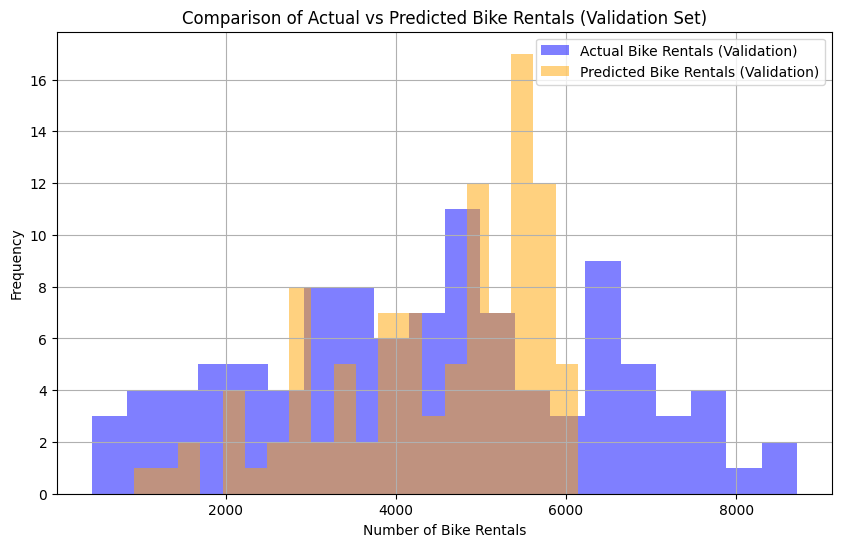

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

best_degree = 2
best_alpha = 100.0
final_model = make_pipeline(PolynomialFeatures(degree=best_degree), Lasso(alpha=best_alpha))

final_model.fit(X_train, y_train)

val_preds = final_model.predict(X_val)

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(y_val, bins=20, alpha=0.5, color='blue', label='Actual Bike Rentals (Validation)')
plt.hist(val_preds, bins=20, alpha=0.5, color='orange', label='Predicted Bike Rentals (Validation)')
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency')
plt.title('Comparison of Actual vs Predicted Bike Rentals (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()


#We saw the RMSE being 1234.49, and the linear model was around 1380.86, Polynomial was 1186.35.
# This shows that my model performed better than the linear model but not better than the polynomial model.
# When we start looking into the histogram we can also see that our predictions 2000 to 6000 bikes were aligned a lot
# but ours spiked higher or lowers more less or larger numbers. We could definately improve our model with better hyperparameter tuning,
# better cross-validation and regularization.